<a href="https://colab.research.google.com/github/Darshan0805/Computer-Vision/blob/main/2348548_CV_ESE2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

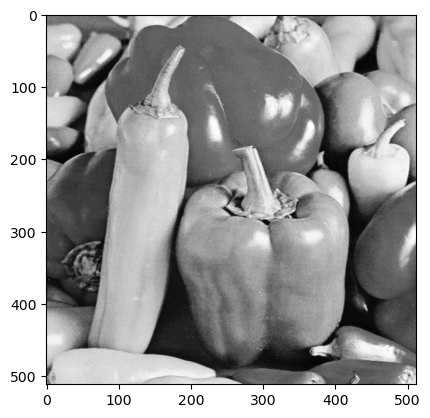

In [ ]:
img=cv2.imread('ESE4.tif',0)
plt.imshow(img,"gray")

## Median Filter

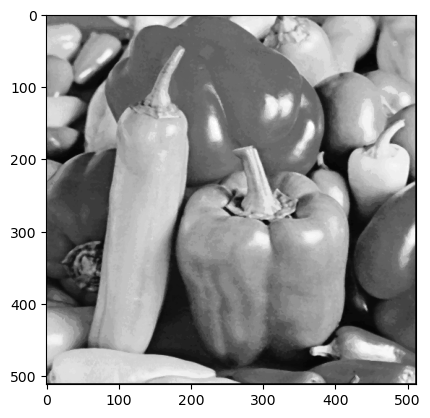

In [ ]:
m, n = img.shape
img_new1 = np.zeros([m, n])
for i in range(1, m-1):
    for j in range(1, n-1):
        temp = [img[i-1, j-1],
               img[i-1, j],
               img[i-1, j + 1],
               img[i, j-1],
               img[i, j],
               img[i, j + 1],
               img[i + 1, j-1],
               img[i + 1, j],
               img[i + 1, j + 1]]
        temp = sorted(temp)
        img_new1[i, j]= temp[4]
plt.imshow(img_new1,"gray")

## Median(Built-in)

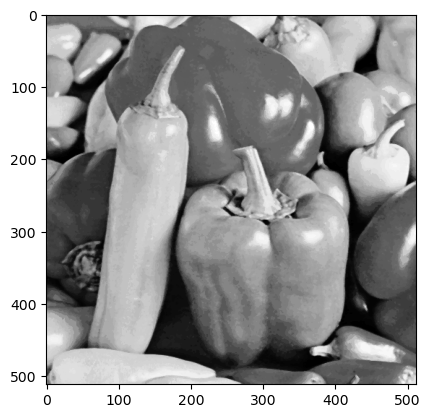

In [ ]:
import scipy.ndimage
img_new_median = scipy.ndimage.median_filter(img, size=3)
plt.imshow(img_new_median, cmap="gray")

## Min Filter

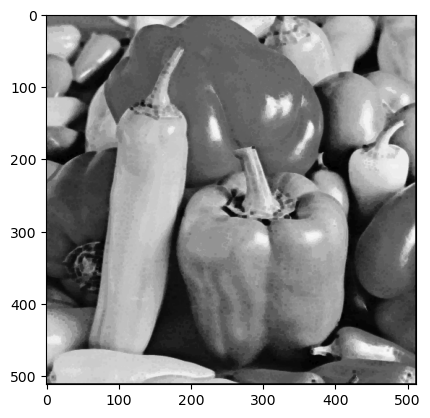

In [ ]:
m, n = img.shape
img_new1 = np.zeros([m, n])
for i in range(1, m-1):
    for j in range(1, n-1):
        temp = [img[i-1, j-1],
               img[i-1, j],
               img[i-1, j + 1],
               img[i, j-1],
               img[i, j],
               img[i, j + 1],
               img[i + 1, j-1],
               img[i + 1, j],
               img[i + 1, j + 1]]
        temp = sorted(temp)
        img_new1[i, j]= temp[0]
plt.imshow(img_new1,"gray")

## Min Filter(Built-in)

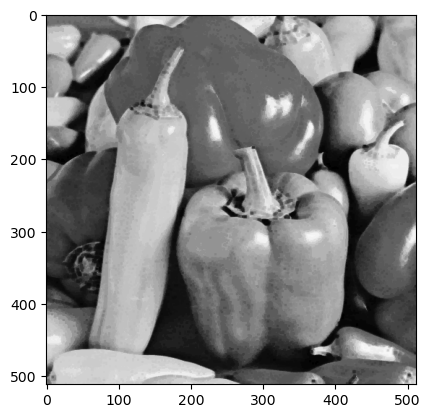

In [ ]:
img_new_min = scipy.ndimage.minimum_filter(img, size=3)
plt.imshow(img_new_min, cmap="gray")

## Inference

 #### Median Filter: The median filter is effective in removing salt-and-pepper noise from images while preserving edges. It replaces each pixel's value with the median value of the neighborhood pixels.
 #### Adaptive median filter: The adaptive median filter is an extension of the median filter that adjusts the filter size based on the local image characteristics. It starts with a small window size and gradually increases it to remove noise effectively.
#### Min Filter: The min filter is useful for finding the darkest points in an image or for eroding light regions adjacent to dark areas. It replaces each pixel's value with the minimum value in its neighborhood, effectively reducing the intensity of brighter areas.

## Question 2

In [ ]:
image = cv2.imread('ESE4.tif')

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
log = cv2.GaussianBlur(gray,(3,3),0)  #Guassian Blur to reduce Noise
log = cv2.Laplacian(log,cv2.CV_64F)  #Laplacian

In [ ]:
def zero_crossings(image):
    rows, cols = image.shape
    zero_crossings = np.zeros(image.shape, dtype=np.uint8)
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            # Check zero crossing
            if (image[i, j] < 0 and image[i, j + 1] > 0) or (image[i, j] > 0 and image[i, j + 1] < 0):
                zero_crossings[i, j] = 255
    return zero_crossings

### Zero Crossing is where the value of the derivative changes from negative to positive or positive to negative

In [ ]:
zero_crossings = zero_crossings(log)

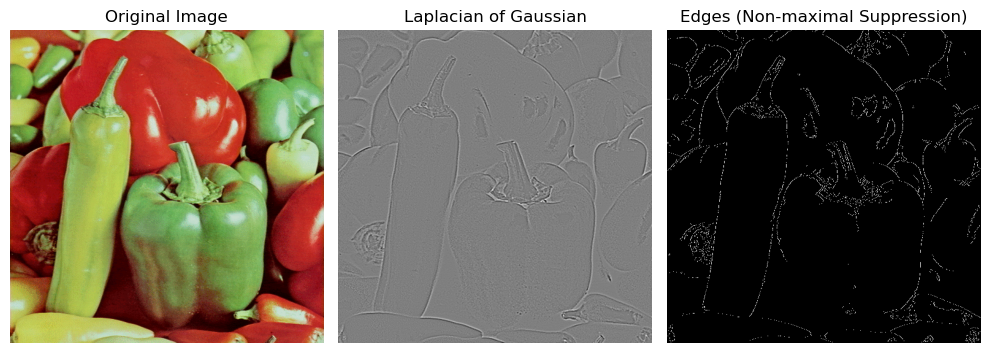

In [ ]:
edges = cv2.bitwise_and(zero_crossings, cv2.Canny(gray, 100, 200))

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(log, cmap='gray')
plt.title('Laplacian of Gaussian')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edges, cmap='gray')
plt.title('Edges (Non-maximal Suppression)')
plt.axis('off')

plt.tight_layout()
plt.show()

#### Laplacian of Gaussian(LoG) is a combination of both laplacian and Gaussian filter to breakdown the image through its in intensity values and detect edges.

#### Non-maximal Suppression is used to suppress all the gradient values (by setting them to 0) except the local maxima, which indicate locations with the sharpest change in intensity value.